In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def compute_depth(imageL, imageR, disp=128, block=15):
    stereo = cv2.StereoBM_create(numDisparities=disp, blockSize=block)

    grayL = cv2.blur(cv2.cvtColor(imageL, cv2.COLOR_BGR2GRAY), (5,5))
    grayR = cv2.blur(cv2.cvtColor(imageR, cv2.COLOR_BGR2GRAY), (5,5))

    disparity = cv2.normalize(stereo.compute(grayL, grayR), None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    return disparity

In [3]:
def overlay_images(source, overlay, mask):
    mask = mask.astype(bool)
    if(len(mask.shape) == 2):
        mask = np.dstack((mask, mask, mask))

    result = np.copy(source)
    h, w = overlay.shape[:2]
    result[0:h, 0:w] = (overlay * mask) + (source[0:h, 0:w] * ~mask)

    return result

### Exemplo do OpenCV (Sample)

In [4]:
FOLDER = "Sample"

left = cv2.imread(f'images/{FOLDER}/L.jpg')
right = cv2.imread(f'images/{FOLDER}/R.jpg')

depth = compute_depth(left, right, disp=16*2, block=13)
_, mask = cv2.threshold(cv2.blur(depth, (5,5)), 80, 255, cv2.THRESH_BINARY)
mask = cv2.normalize(mask, None, 0, 1, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

blurred = cv2.GaussianBlur(left, (41,41), 0)

result = overlay_images(blurred, left, mask)
cv2.imwrite(f'results/{FOLDER}.png', result)

pass

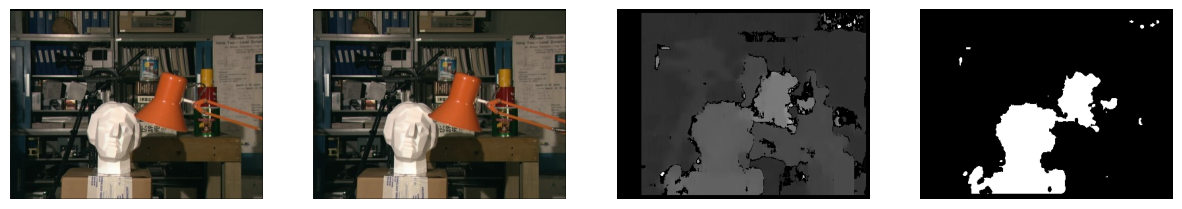

In [5]:
f, axs = plt.subplots(1,4, figsize=(15,30))
axs[0].imshow(cv2.cvtColor(left, cv2.COLOR_RGB2BGR))
axs[1].imshow(cv2.cvtColor(right, cv2.COLOR_RGB2BGR))
axs[2].imshow(depth, cmap='gray')
axs[3].imshow(mask, cmap='gray')
for ax in axs: ax.axis('off') 
plt.show()

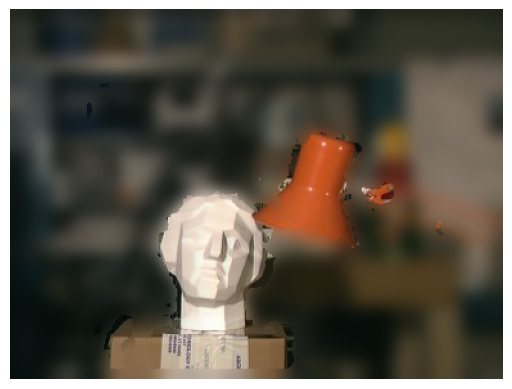

In [6]:
plt.imshow(cv2.cvtColor(result, cv2.COLOR_RGB2BGR))
plt.axis('off')
plt.show()

### Planta (Plant)

In [7]:
FOLDER = "Plant"

left = cv2.imread(f'images/{FOLDER}/L.jpg')
right = cv2.imread(f'images/{FOLDER}/R.jpg')

depth = compute_depth(left, right, disp=16*4, block=11)
_, mask = cv2.threshold(cv2.blur(depth,(5,5)), 165, 255, cv2.THRESH_BINARY)
mask = cv2.normalize(mask, None, 0, 1, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

blurred = cv2.GaussianBlur(left, (31,31), 0)

result = overlay_images(blurred, left, mask)
cv2.imwrite(f'results/{FOLDER}.png', result)

pass

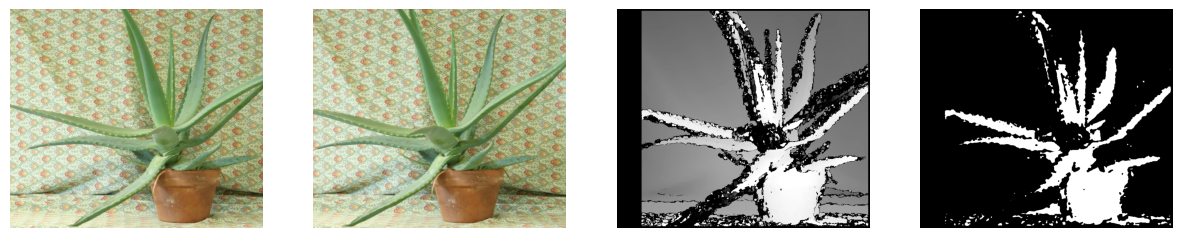

In [8]:
f, axs = plt.subplots(1,4, figsize=(15,30))
axs[0].imshow(cv2.cvtColor(left, cv2.COLOR_RGB2BGR))
axs[1].imshow(cv2.cvtColor(right, cv2.COLOR_RGB2BGR))
axs[2].imshow(depth, cmap='gray')
axs[3].imshow(mask, cmap='gray')
for ax in axs: ax.axis('off') 
plt.show()

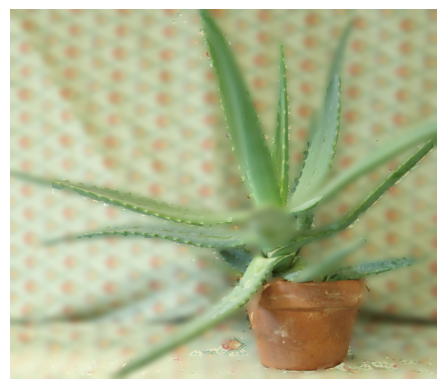

In [9]:
plt.imshow(cv2.cvtColor(result, cv2.COLOR_RGB2BGR))
plt.axis('off')
plt.show()

### Mirante (Lookout)

In [10]:
FOLDER = "Lookout"

left = cv2.imread(f'images/{FOLDER}/L.jpg')
right = cv2.imread(f'images/{FOLDER}/R.jpg')

depth = compute_depth(left, right, disp=16*11, block=11)
_, mask = cv2.threshold(cv2.blur(depth,(5,5)), 165, 255, cv2.THRESH_BINARY)
mask = cv2.normalize(mask, None, 0, 1, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

blurred = cv2.GaussianBlur(left, (35,35), 0)

result = overlay_images(blurred, left, mask)
cv2.imwrite(f'results/{FOLDER}.png', result)

pass

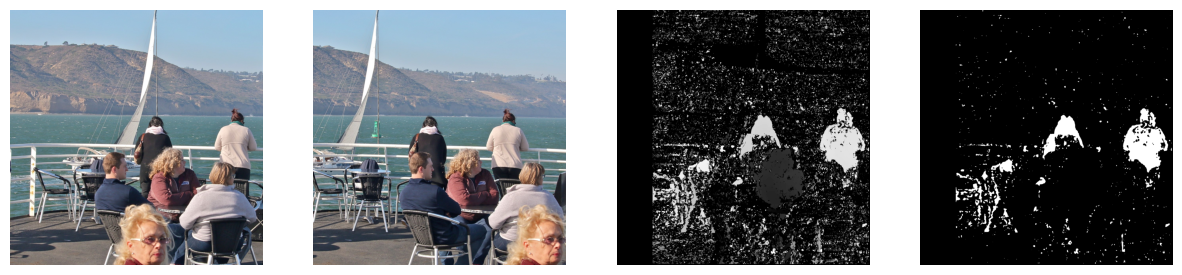

In [11]:
f, axs = plt.subplots(1,4, figsize=(15,30))
axs[0].imshow(cv2.cvtColor(left, cv2.COLOR_RGB2BGR))
axs[1].imshow(cv2.cvtColor(right, cv2.COLOR_RGB2BGR))
axs[2].imshow(depth, cmap='gray')
axs[3].imshow(mask, cmap='gray')
for ax in axs: ax.axis('off') 
plt.show()

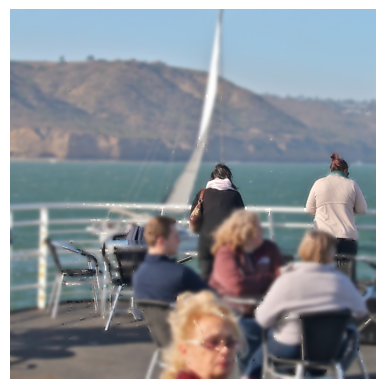

In [12]:
plt.imshow(cv2.cvtColor(result, cv2.COLOR_RGB2BGR))
plt.axis('off')
plt.show()